<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.409898,77.766746,84.649983,10.508988,219.335615,210.394323,8.941292
1,0.0,1.0,73.299277,98.089389,85.920011,-24.045340,243.263338,270.019412,-26.756074
2,0.0,2.0,58.300315,23.155259,40.375941,-20.301094,111.530421,129.927115,-18.396694
3,0.0,3.0,76.124409,40.928598,48.197695,-26.300389,148.950312,174.388884,-25.438572
4,0.0,4.0,65.896599,52.675057,80.749789,-9.841017,199.480428,209.168815,-9.688387
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.524012,95.954982,72.118412,50.477903,260.075310,217.785313,42.289997
59996,999.0,56.0,85.239744,26.612055,88.664145,1.225400,211.741344,200.830636,10.910708
59997,999.0,57.0,70.442877,44.287894,23.880736,-16.223145,132.388362,160.319767,-27.931405
59998,999.0,58.0,45.322622,58.915231,76.993468,-16.785308,174.446012,192.080838,-17.634826


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    36.409898  77.766746  84.649983  10.508988  219.335615   
      1.0    73.299277  98.089389  85.920011 -24.045340  243.263338   
      2.0    58.300315  23.155259  40.375941 -20.301094  111.530421   
      3.0    76.124409  40.928598  48.197695 -26.300389  148.950312   
      4.0    65.896599  52.675057  80.749789  -9.841017  199.480428   
...                ...        ...        ...        ...         ...   
999.0 55.0   31.524012  95.954982  72.118412  50.477903  260.075310   
      56.0   85.239744  26.612055  88.664145   1.225400  211.741344   
      57.0   70.442877  44.287894  23.880736 -16.223145  132.388362   
      58.0   45.322622  58.915231  76.993468 -16.785308  174.446012   
      59.0   37.716902  94.953643  74.031661  -8.938147  207.764059   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    210.394323   8.941292  
      1.0    270.019412 -26.756074  
      2.0    129.927115 -18.396694  
      3.0    174.388884 -25.438572  
      4.0    209.168815  -9.688387  
...                 ...        ...  
999.0 55.0   217.785313  42.289997  
      56.0   200.830636  10.910708  
      57.0   160.319767 -27.931405  
      58.0   192.080838 -17.634826  
      59.0   223.764245 -16.000186  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    36.409898  77.766746  84.649983  10.508988  219.335615   
      1.0    73.299277  98.089389  85.920011 -24.045340  243.263338   
      2.0    58.300315  23.155259  40.375941 -20.301094  111.530421   
      3.0    76.124409  40.928598  48.197695 -26.300389  148.950312   
      4.0    65.896599  52.675057  80.749789  -9.841017  199.480428   
...                ...        ...        ...        ...         ...   
999.0 55.0   31.524012  95.954982  72.118412  50.477903  260.075310   
      56.0   85.239744  26.612055  88.664145   1.225400  211.741344   
      57.0   70.442877  44.287894  23.880736 -16.223145  132.388362   
      58.0   45.322622  58.915231  76.993468 -16.785308  174.446012   
      59.0   37.716902  94.953643  74.031661  -8.938147  207.764059   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    210.394323   8.941292  
      1.0    270.019412 -26.756074  
      2.0    129.927115 -18.396694  
      3.0    174.388884 -25.438572  
      4.0    209.168815  -9.688387  
...                 ...        ...  
999.0 55.0   217.785313  42.289997  
      56.0   200.830636  10.910708  
      57.0   160.319767 -27.931405  
      58.0   192.080838 -17.634826  
      59.0   223.764245 -16.000186  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.409898,77.766746,84.649983,10.508988,219.335615,210.394323,8.941292
1,0.0,1.0,73.299277,98.089389,85.920011,-24.045340,243.263338,270.019412,-26.756074
2,0.0,2.0,58.300315,23.155259,40.375941,-20.301094,111.530421,129.927115,-18.396694
3,0.0,3.0,76.124409,40.928598,48.197695,-26.300389,148.950312,174.388884,-25.438572
4,0.0,4.0,65.896599,52.675057,80.749789,-9.841017,199.480428,209.168815,-9.688387
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.524012,95.954982,72.118412,50.477903,260.075310,217.785313,42.289997
59996,999.0,56.0,85.239744,26.612055,88.664145,1.225400,211.741344,200.830636,10.910708
59997,999.0,57.0,70.442877,44.287894,23.880736,-16.223145,132.388362,160.319767,-27.931405
59998,999.0,58.0,45.322622,58.915231,76.993468,-16.785308,174.446012,192.080838,-17.634826


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    36.409898  77.766746  84.649983  10.508988  219.335615   
      1.0    73.299277  98.089389  85.920011 -24.045340  243.263338   
      2.0    58.300315  23.155259  40.375941 -20.301094  111.530421   
      3.0    76.124409  40.928598  48.197695 -26.300389  148.950312   
      4.0    65.896599  52.675057  80.749789  -9.841017  199.480428   
...                ...        ...        ...        ...         ...   
999.0 55.0   31.524012  95.954982  72.118412  50.477903  260.075310   
      56.0   85.239744  26.612055  88.664145   1.225400  211.741344   
      57.0   70.442877  44.287894  23.880736 -16.223145  132.388362   
      58.0   45.322622  58.915231  76.993468 -16.785308  174.446012   
      59.0   37.716902  94.953643  74.031661  -8.938147  207.764059   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    210.394323   8.941292  
      1.0    270.019412 -26.756074  
      2.0    129.927115 -18.396694  
      3.0    174.388884 -25.438572  
      4.0    209.168815  -9.688387  
...                 ...        ...  
999.0 55.0   217.785313  42.289997  
      56.0   200.830636  10.910708  
      57.0   160.319767 -27.931405  
      58.0   192.080838 -17.634826  
      59.0   223.764245 -16.000186  

[60000 rows x 7 columns]

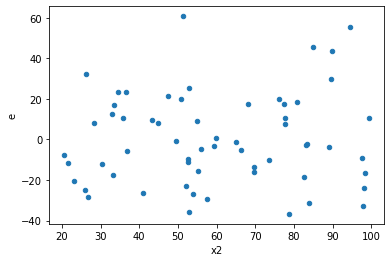

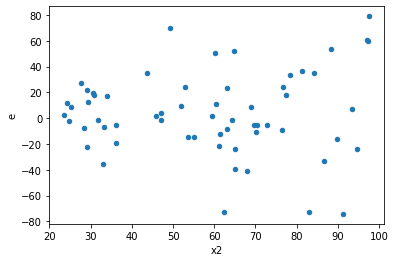

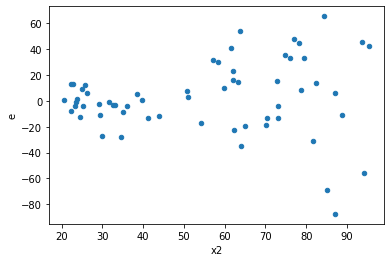

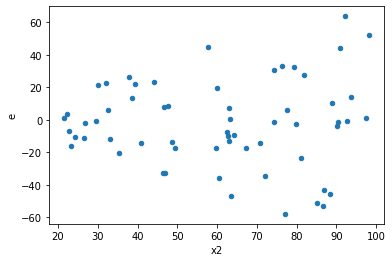

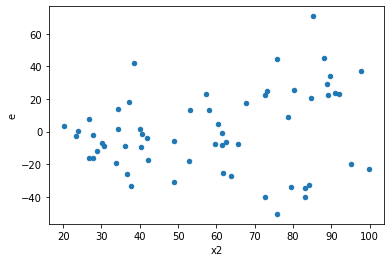

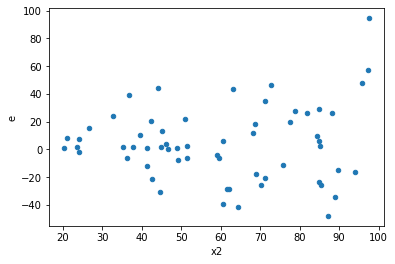

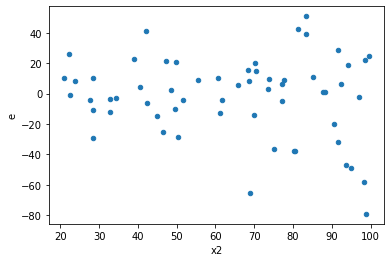

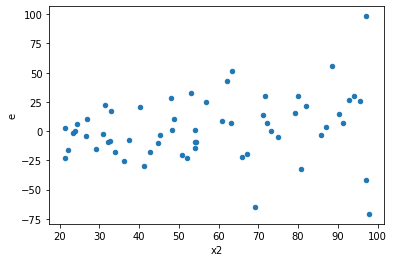

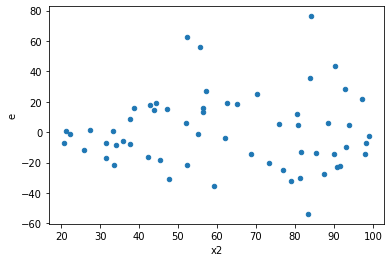

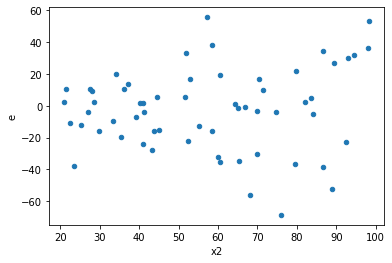

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,22.0,32.0,15616.828314076016,35875.62278052468,709.8558324580007,1121.1132118913963,1.5793533850519261,0.23339099822693155,0.8833045008865342,0.11669549911346577,Reject001=1 : Homoscedasticity
3.0,22.0,32.0,12683.270449324644,24536.594309544784,576.5122931511202,766.7685721732745,1.3300125275425527,0.4527741956119,0.77361290219405,0.22638709780595,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,13382.37018512366,23093.08609286389,495.6433401897652,855.2994849208849,1.7256349789617256,0.16272955123870791,0.918635224380646,0.08136477561935396,Reject001=1 : Homoscedasticity
8.0,28.0,26.0,8721.49588932969,20856.31332372816,311.4819960474889,802.1658970664678,2.575320266485542,0.017659115165780337,0.9911704424171098,0.008829557582890168,Reject001=1 : Homoscedasticity
9.0,31.0,23.0,17264.29894880734,17216.436781592118,556.9128693163658,748.5407296344399,1.3440894812743427,0.46740693684306023,0.7662965315784699,0.23370346842153011,Reject001=1 : Homoscedasticity
11.0,28.0,26.0,18410.29968784335,26605.38491439139,657.5107031372626,1023.2840351688997,1.5563001944856218,0.26040891748603756,0.8697955412569812,0.13020445874301878,Reject001=1 : Homoscedasticity
12.0,26.0,28.0,10792.442752058798,15071.046386575947,415.09395200226146,538.2516566634266,1.2966983837444448,0.5007750788167455,0.7496124605916272,0.2503875394083728,Reject001=1 : Homoscedasticity
13.0,25.0,29.0,10338.975492404501,27842.42767253951,413.55901969618003,960.08371284619,2.3215155929896363,0.03056341144802599,0.984718294275987,0.015281705724012995,Reject001=1 : Homoscedasticity
16.0,27.0,27.0,15563.501674027251,32221.610620813444,576.4259879269352,1193.3929859560535,2.0703316834273644,0.06383393636394286,0.9680830318180286,0.03191696818197143,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,16673.60168812726,12692.59841242463,555.7867229375753,528.8582671843595,0.9515489401925848,0.8874154449812099,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,15616.828314076016,35875.62278052468,709.8558324580007,1121.1132118913963,1.5793533850519261,0.23339099822693155,Reject001=1 : Homoscedasticity
2.0,31.0,23.0,41328.69540878553,2653.6211824070024,1333.1837228640493,115.37483401769576,0.08654083607459484,2.7513300738278734e-09,Reject001=0 : Heteroscedasticity
3.0,22.0,32.0,12683.270449324644,24536.594309544784,576.5122931511202,766.7685721732745,1.3300125275425527,0.4527741956119,Reject001=1 : Homoscedasticity
4.0,29.0,25.0,22926.078671546562,9168.938206319077,790.5544369498814,366.75752825276305,0.46392444480836464,0.048157019772774305,Reject001=1 : Homoscedasticity
5.0,31.0,23.0,26991.445305847752,8740.899970545157,870.6917840596049,380.03912915413724,0.4364795167610321,0.032109850511655116,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,32027.70089630382,6730.630972114572,1067.590029876794,280.44295717144047,0.26268787579798325,0.0006830280240094952,Reject001=0 : Heteroscedasticity
7.0,27.0,27.0,13382.37018512366,23093.08609286389,495.6433401897652,855.2994849208849,1.7256349789617256,0.16272955123870791,Reject001=1 : Homoscedasticity
8.0,28.0,26.0,8721.49588932969,20856.31332372816,311.4819960474889,802.1658970664678,2.575320266485542,0.017659115165780337,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      777
Reject001=0 : Heteroscedasticity    223
Name: Result_test, dtype: int64